In [1]:
# We put our code here!

In [77]:
with open('./YelpAPIKeys.txt','r') as f:
    count = 0
    for line in f:
        if count == 0:
            CLIENT_ID = line.strip()
        if count == 1:
            API_KEY = line.strip()
        count+=1

In [78]:
print(CLIENT_ID,"\n",API_KEY)

UFH0gcOYhVYWXEqxTXqoiQ 
 ovv6T1Nhr_IMsxMQWLbe2K1kbo2AELjJ09yqk0VkiZcvdpksEqs1q4SoOpfLLUPxsHHz5tq5_oShbmfunhpn9G2qeY_xeGMqdwgTMYC2sWVXu9uULmqi32aAI-3ZW3Yx


In [79]:
API_HOST = 'https://api.yelp.com' 
SEARCH_PATH = '/v3/businesses/search' 
BUSINESS_PATH = '/v3/businesses/'

In [80]:
!pip install requests

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [81]:
def get_restaurants(api_key,location,number=15):
    import requests
    
    search_data = {
    'term': "restaurant",
    'location': location.replace(' ', '+'),
    'limit': number
    }
    url = API_HOST + SEARCH_PATH
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    response = requests.request('GET', url, headers=headers, params=search_data).json()
    businesses = response.get('businesses')
    return businesses

In [82]:
rests = get_restaurants(API_KEY,"Chinatown, New York, NY")
rests

[{'id': 'Lbs8QBRN1U7IYBo5Mcv-RQ',
  'alias': '88-lan-zhou-handmade-noodles-new-york',
  'name': '88 Lan Zhou Handmade Noodles',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/18OSugPW766TSqMxuqc5Ww/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/88-lan-zhou-handmade-noodles-new-york?adjust_creative=UFH0gcOYhVYWXEqxTXqoiQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=UFH0gcOYhVYWXEqxTXqoiQ',
  'review_count': 1566,
  'categories': [{'alias': 'chinese', 'title': 'Chinese'},
   {'alias': 'noodles', 'title': 'Noodles'}],
  'rating': 4.0,
  'coordinates': {'latitude': 40.7155, 'longitude': -73.99675},
  'transactions': [],
  'price': '$',
  'location': {'address1': '40 Bowery St',
   'address2': None,
   'address3': '',
   'city': 'New York',
   'zip_code': '10013',
   'country': 'US',
   'state': 'NY',
   'display_address': ['40 Bowery St', 'New York, NY 10013']},
  'phone': '+16466830939',
  'display_phone': '(646) 683-0939',
  'distance':

In [83]:
!pip install bs4 

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [84]:
from bs4 import BeautifulSoup
import requests

In [85]:
# get all restaurants attributes
# all_rests = dict()
all_rests = list()

for i in rests:
    
    each_rest = dict()
    
    # for attributes from API
#     name = i['name']

    each_rest['name'] = i['name']
    each_rest['categories'] = i['categories']
    each_rest['rating'] = i['rating']
    each_rest['distance'] = i['distance']
    each_rest['is_closed'] = i['is_closed']
    each_rest['location'] = i['location']
    
    # for attributes from web scraping url
    url = i['url']
    try: 
        response = requests.get(url)
        results_page = BeautifulSoup(response.content,'lxml') 
        info = results_page.find_all('div',class_="ywidget")[2].find_all('dl')
        
        for i in info:
            r = i.find('dt').get_text().strip(' ')[33:-1]
            v = i.find('dd').get_text().strip(' ')[33:-1]
            each_rest[r] = v

        price = results_page.find_all('div',class_="price-category")[0].find_all('span')[1].get_text()
        
        if price =='$' or price == '$$' or price == '$$$' or price == '$$$$':
            each_rest['price']= price 
            
        else: 
            price = results_page.find_all('div',class_="price-category")[1].find_all('span')[1].get_text()
            each_rest['price']= price 


#         all_rests[name] = each_rest
        all_rests.append(each_rest)
    
    except:
        pass

all_rests

[{'name': '88 Lan Zhou Handmade Noodles',
  'categories': [{'alias': 'chinese', 'title': 'Chinese'},
   {'alias': 'noodles', 'title': 'Noodles'}],
  'rating': 4.0,
  'distance': 58.12663700977056,
  'is_closed': False,
  'location': {'address1': '40 Bowery St',
   'address2': None,
   'address3': '',
   'city': 'New York',
   'zip_code': '10013',
   'country': 'US',
   'state': 'NY',
   'display_address': ['40 Bowery St', 'New York, NY 10013']},
  'price': '$'},
 {'name': "Joe's Shanghai",
  'categories': [{'alias': 'shanghainese', 'title': 'Shanghainese'},
   {'alias': 'seafood', 'title': 'Seafood'},
   {'alias': 'venues', 'title': 'Venues & Event Spaces'}],
  'rating': 4.0,
  'distance': 176.17294074236378,
  'is_closed': False,
  'location': {'address1': '9 Pell St',
   'address2': '',
   'address3': '',
   'city': 'New York',
   'zip_code': '10013',
   'country': 'US',
   'state': 'NY',
   'display_address': ['9 Pell St', 'New York, NY 10013']},
  'd by Vegetarians': '',
  'Takes R

In [ ]:
# for algorithm

In [93]:
!pip install pandas
!pip install numpy
!pip install re

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [94]:
# import user data
import pandas as pd
import numpy
customer_df = pd.read_csv('test.csv', header= 0)
# customer_df.set_index("User", inplace= True)

In [95]:
#normalize all value in dictionary to list use recursion
def flatten(a):
    new_list = []
    if isinstance(a,list):
        for item in a:
        # Look at each item in iterable. 
            if isinstance(item, dict):  
            # If the item is a list, then flatten that list
                flattened_inner_list = flatten(item)
                new_list.extend(flattened_inner_list)
            else:
            # If the item is not a list, just append it to the growing flat list that will be returned.
                new_list.append(item)
    
    if isinstance(a,dict):
        new_list = list(a.values())
    else:
         new_list.append(a)
    return new_list

In [96]:


def if_match(key,preference):
    #rep = r'\b\w+'
    pattern = re.compile(r''+key+'')
    string = preference
    match = pattern.search(string)
    return bool(match)

In [97]:
#score algo blueprint. goddam hard core function.... how to optimize run time?
s = dict()
def score (rests, customer_df):

    for i in range (len(rests)): 
        #print(i)
        count_1 = 0
        count_2 = 0
        count_3 = 0
        for key in rests[i].keys():
#         for key in rests[i]:
            for p in range (len(customer_df.columns)):
                #print(key)
                if if_match(key.lower(), customer_df.columns[p].lower()) == True:
                    #print(key)
                    for v in customer_df.iloc[:,p]:
                        #print(type(v))
                        if type(v) == numpy.float64:
                            if v<=rests[i].get(key):
                                #print('Yes')
                                count_1 = count_1 + 1 
                                #print(count_1)
                        if customer_df.columns[p] == 'price':
                            if len(v) >= len(rests[i].get(key)):
                                count_3 = count_3 + 1
                                #print(count_3)
                            
                        else:
                            if type(v) != numpy.float64:
                                if v in flatten(rests[i].get(key)):
                                    #print(v)
                                    count_2 = count_2 + 1
                                    #print(count_2)
        count = count_1+count_2+count_3
        #print(count)
        if rests[i].get('is_closed') == False:
            #s.update({rests[i].get('name'):count})
            s.update({i:count})
    return s

In [98]:
a = score(all_rests, customer_df)

def final(s, rests):
    
    s_sorted = sorted(s, key=s.get, reverse=True)
    df = pd.concat([pd.DataFrame({'name': [rests[r].get('name')],
                   'contact number': [rests[r].get('phone')],
                   'address': [rests[r]['location'].get('display_address')]}) 
        for r in s_sorted], ignore_index=True)
    df = df[['name','contact number','address']]
    df = df.iloc[0].T
    print ('Best match for your group')
    print (df)

b = final (a,all_rests)

NameError: name 're' is not defined

In [99]:
# for comment word cloud 

!pip install wordcloud
!pip install matplotlib

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [100]:
# function that get business review
def get_business_review(api_key,business_id):
    import json
    import requests
    business_path = BUSINESS_PATH + business_id+"/reviews"
    url = API_HOST + business_path

    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    response = requests.request('GET', url, headers=headers).json()
   
    review_text = ''
    for review in response['reviews']:
        review_text += review['text']
    return review_text

In [104]:
flat_top_review = get_business_review(API_KEY,'flat-top-new-york')
# flat_top_review = get_business_review(API_KEY, "Aunt Jake's")
flat_top_review

"I've only eaten in the restaurant a couple times, but their delivery is great. Shrimp and grits were tasty, if a bit sweet; brunch cobb salad was fantastic;...[Español abajo]Staff are super nice the menú in my opinión is too simple and lack of variety. I ordered a burger tht was great. I put 3 stars because is...We made a preshow reservation for Friday at 6 pm, and definitely didn't need it, though the place was hopping by 7.\n\nThey dealt admirably with our picky..."

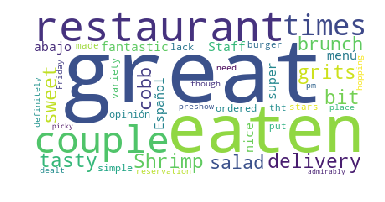

In [105]:
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(flat_top_review)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()